<a href="https://www.kaggle.com/code/jorgeluiscruzquispe/sound-pollution?scriptVersionId=183888253" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center><i>Sound pollution</i></center>
---

In [1]:
!pip install -q leafmap

In [2]:
import leafmap.foliumap as leafmap
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely

In [3]:
def polygon_contour(gdf):
    
    contorno = gdf.total_bounds
    
    polygon = shapely.geometry.Polygon([
        (contorno[0], contorno[1]),
        (contorno[0], contorno[3]),
        (contorno[2], contorno[3]),
        (contorno[2], contorno[1]),
        (contorno[0], contorno[1]),
    ])

    polygon_gdf = gpd.GeoDataFrame(geometry = [polygon], crs = str(gdf.crs))
    
    polygon_gdf["Tipo"] = "Area de influencia"
    
    polygon_gdf["Area (hec)"] = polygon_gdf.geometry.area[0]/10000
    
    return polygon_gdf

In [4]:
df = pd.read_excel("/kaggle/input/ruido-vibraciones/EATRuidoyVibraciones_2911541716869047382.xlsx")

df['Valor'] = df.Valor.str.replace(',', '.').astype(float)

df["geometry"] = df.apply(lambda punto: shapely.geometry.Point(punto.Este, punto.Norte), axis = 1)

df.head(3)

,Número de informe,Nombre de la Evaluación,Etapa,Componente ambiental,Procedencia de la Muestra,Procedencia Especifica de la Muestra,Nombre del punto,Este,Norte,Altitud,...,Tipo de análisis,Zona de aplicación,Fecha inicio,Hora inicio,Fecha fin,Hora fin,Valor,Parámetro,Unidad de medida,geometry
0,INFORME N° 00313-2019-OEFA/DEAM-STEC,Evaluación ambiental en el área de influencia ...,Cuarto monitoreo,Ruido,Ruido ambiental,No aplica,RU-01,793557,9222356,3516,...,No aplica,Residencial,9/8/19,9:39:15 AM,9/8/19,10:00:01 AM,45.2,Nivel de presión sonora continua equivalente c...,dB,POINT (793557 9222356)
1,INFORME N° 00313-2019-OEFA/DEAM-STEC,Evaluación ambiental en el área de influencia ...,Cuarto monitoreo,Ruido,Ruido ambiental,No aplica,RU-01,793557,9222356,3516,...,No aplica,Residencial,9/8/19,9:39:15 AM,9/8/19,10:00:01 AM,35.2,Nivel de presión sonora mínimo con ponderación...,dB,POINT (793557 9222356)
2,INFORME N° 00313-2019-OEFA/DEAM-STEC,Evaluación ambiental en el área de influencia ...,Cuarto monitoreo,Ruido,Ruido ambiental,No aplica,RU-01,793557,9222356,3516,...,No aplica,Residencial,9/8/19,9:39:15 AM,9/8/19,10:00:01 AM,61.2,Nivel de presión sonora máximo con ponderación...,dB,POINT (793557 9222356)


In [5]:
df.Zona.unique()

array([17, 18])

In [6]:
gdf_17S = gpd.GeoDataFrame(df[df["Zona"] == 17], geometry = "geometry", crs = "EPSG:32717")

gdf_18S = gpd.GeoDataFrame(df[df["Zona"] == 18], geometry = "geometry", crs = "EPSG:32718")

In [7]:
gdf_17S.Parámetro.unique()

array(['Nivel de presión sonora continua equivalente con ponderación A (LAeqT)',
       'Nivel de presión sonora mínimo con ponderación en frecuencia A y temporal F (LAF min)',
       'Nivel de presión sonora máximo con ponderación en frecuencia A y temporal F (LAF máx)'],
      dtype=object)

In [8]:
gdf_18S.Parámetro.unique()

array(['LEL máximo', 'LEL minimo',
       'Nivel de presión sonora continua equivalente con ponderación A (LAeqT) - Sonido total'],
      dtype=object)

In [9]:
gdf_17S_LAeqT = gdf_17S[gdf_17S.Parámetro == gdf_17S.Parámetro.unique()[0]].copy()
gdf_17S_LAF_min = gdf_17S[gdf_17S.Parámetro == gdf_17S.Parámetro.unique()[1]].copy()
gdf_17S_LAF_max = gdf_17S[gdf_17S.Parámetro == gdf_17S.Parámetro.unique()[2]].copy()

gdf_18S_LEL_max = gdf_18S[gdf_18S.Parámetro == gdf_18S.Parámetro.unique()[0]].copy()
gdf_18S_LEL_min = gdf_18S[gdf_18S.Parámetro == gdf_18S.Parámetro.unique()[1]].copy()
gdf_18S_LAeqT = gdf_18S[gdf_18S.Parámetro == gdf_18S.Parámetro.unique()[2]].copy()

In [10]:
gdf_17S_countour = polygon_contour(gdf_17S)

Map = leafmap.Map()

Map.add_basemap("HYBRID")

Map.add_gdf(gdf_17S, style = {}, layer_name = "layer")

Map.add_gdf(gdf_17S_countour, style = {"color": "red", "fillOpacity": 0}, layer_name = "layer")

Map.add_title(gdf_17S["Nombre de la Evaluación"].values[0].upper(), font_size = "14px")

Map.add_text(gdf_17S["Número de informe"].values[0], bg_color = "black", fontcolor = "white", fontsize = 14)

Map

In [11]:
gdf_18S_countour = polygon_contour(gdf_18S)

Map = leafmap.Map()

Map.add_basemap("HYBRID")

Map.add_gdf(gdf_18S, style = {}, layer_name = "layer")

Map.add_gdf(gdf_18S_countour, style = {"color": "red", "fillOpacity": 0}, layer_name = "layer")

Map.add_title(gdf_18S["Nombre de la Evaluación"].values[0].upper(), font_size = "14px")

Map.add_text(gdf_18S["Número de informe"].values[0], bg_color = "black", fontcolor = "white", fontsize = 14)

Map

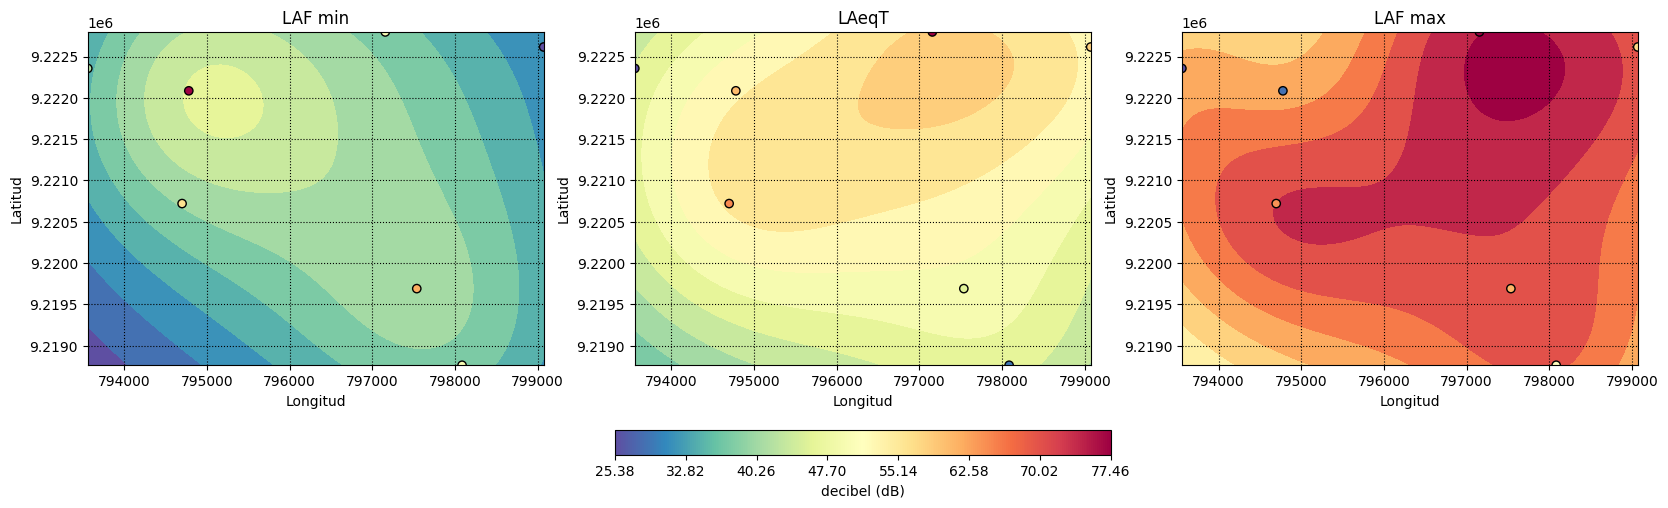

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 7))

color_map = "Spectral_r"

# Datos de ejemplo (sustituye por tus datos reales)
x1 = gdf_17S_LAF_min.Este.to_numpy()
y1 = gdf_17S_LAF_min.Norte.to_numpy()
z1 = gdf_17S_LAF_min.Valor.to_numpy()

x2 = gdf_17S_LAeqT.Este.to_numpy()
y2 = gdf_17S_LAeqT.Norte.to_numpy()
z2 = gdf_17S_LAeqT.Valor.to_numpy()

x3 = gdf_17S_LAF_max.Este.to_numpy()
y3 = gdf_17S_LAF_max.Norte.to_numpy()
z3 = gdf_17S_LAF_max.Valor.to_numpy()

xi, yi = np.meshgrid(
    np.linspace(gdf_17S_countour.total_bounds[0], gdf_17S_countour.total_bounds[2], 100), 
    np.linspace(gdf_17S_countour.total_bounds[1], gdf_17S_countour.total_bounds[3], 100)
)

# Realizar la interpolación IDW
rbf1 = Rbf(x1, y1, z1, function = 'inverse')
rbf2 = Rbf(x2, y2, z2, function = 'inverse')
rbf3 = Rbf(x3, y3, z3, function = 'inverse')

zi1 = rbf1(xi, yi)
zi2 = rbf2(xi, yi)
zi3 = rbf3(xi, yi)

# Determinar los límites comunes para la escala de colores
vmin = min(np.min(zi1), np.min(zi2), np.min(zi3))
vmax = max(np.max(zi1), np.max(zi2), np.max(zi3))

# Gráfico de contorno para el primer conjunto de datos
contour1 = ax1.contourf(xi, yi, zi1, cmap = color_map, vmin = vmin, vmax = vmax)
ax1.scatter(x1, y1, c = z1, cmap = color_map, edgecolor = 'k', label='Data Points')
ax1.set_title("LAF min")
ax1.set_xlabel("Longitud")
ax1.set_ylabel("Latitud")
ax1.grid(True, c = "black", ls = ":")
ax1.set_aspect('equal')

# Gráfico de contorno para el segundo conjunto de datos
contour2 = ax2.contourf(xi, yi, zi2, cmap = color_map, vmin=vmin, vmax=vmax)
ax2.scatter(x2, y2, c = z2, cmap = color_map, edgecolor = 'k', label='Data Points')
ax2.set_title("LAeqT")
ax2.set_xlabel("Longitud")
ax2.set_ylabel("Latitud")
ax2.grid(True, c = "black", ls = ":")
ax2.set_aspect('equal')

# Gráfico de contorno para el tercer conjunto de datos
contour3 = ax3.contourf(xi, yi, zi3, cmap = color_map, vmin = vmin, vmax = vmax)
ax3.scatter(x3, y3, c = z3, cmap = color_map, edgecolor = 'k', label='Data Points')
ax3.set_title("LAF max")
ax3.set_xlabel("Longitud")
ax3.set_ylabel("Latitud")
ax3.grid(True, c = "black", ls = ":")
ax3.set_aspect('equal')

norm = plt.Normalize(vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap = color_map, norm = norm)
sm.set_array([])


# Crear una única barra de color para todos los gráficos
cbar = fig.colorbar(sm, ax = [ax1, ax2, ax3], orientation = 'horizontal', fraction = 0.046, pad = 0.12)
cbar.set_label('decibel (dB)')
cbar.set_ticks(np.linspace(vmin, vmax, 8))

plt.show()

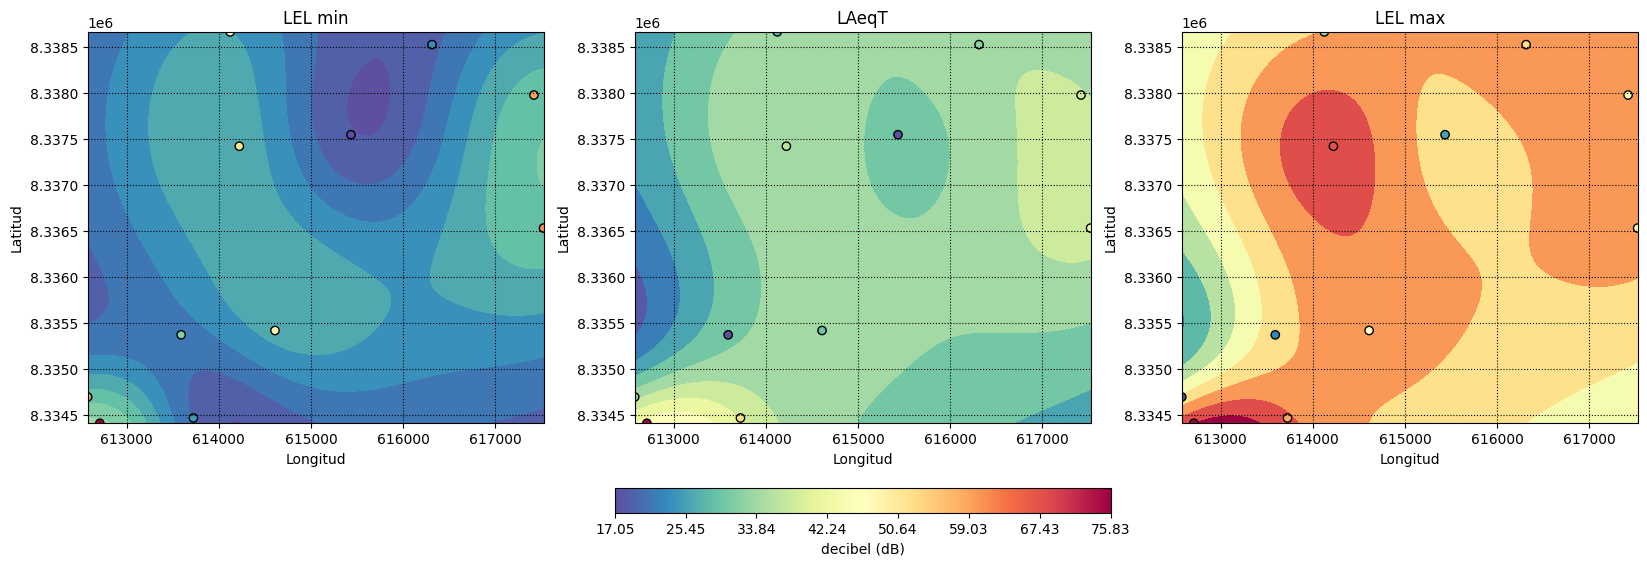

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

color_map = "Spectral_r"

# Datos de ejemplo (sustituye por tus datos reales)
x1 = gdf_18S_LEL_min.Este.to_numpy()
y1 = gdf_18S_LEL_min.Norte.to_numpy()
z1 = gdf_18S_LEL_min.Valor.to_numpy()

x2 = gdf_18S_LAeqT.Este.to_numpy()
y2 = gdf_18S_LAeqT.Norte.to_numpy()
z2 = gdf_18S_LAeqT.Valor.to_numpy()

x3 = gdf_18S_LEL_max.Este.to_numpy()
y3 = gdf_18S_LEL_max.Norte.to_numpy()
z3 = gdf_18S_LEL_max.Valor.to_numpy()

xi, yi = np.meshgrid(
    np.linspace(gdf_18S_countour.total_bounds[0], gdf_18S_countour.total_bounds[2], 700), 
    np.linspace(gdf_18S_countour.total_bounds[1], gdf_18S_countour.total_bounds[3], 700)
)

# Realizar la interpolación IDW
rbf1 = Rbf(x1, y1, z1, function = 'inverse')
rbf2 = Rbf(x2, y2, z2, function = 'inverse')
rbf3 = Rbf(x3, y3, z3, function = 'inverse')

zi1 = rbf1(xi, yi)
zi2 = rbf2(xi, yi)
zi3 = rbf3(xi, yi)

# Determinar los límites comunes para la escala de colores
vmin = min(np.min(zi1), np.min(zi2), np.min(zi3))
vmax = max(np.max(zi1), np.max(zi2), np.max(zi3))

# Gráfico de contorno para el primer conjunto de datos
contour1 = ax1.contourf(xi, yi, zi1, cmap = color_map, vmin = vmin, vmax = vmax)
ax1.scatter(x1, y1, c = z1, cmap = color_map, edgecolor = 'k', label = 'Data Points')
ax1.set_title("LEL min")
ax1.set_xlabel("Longitud")
ax1.set_ylabel("Latitud")
ax1.grid(True, c = "black", ls = ":")
ax1.set_aspect('equal')

# Gráfico de contorno para el segundo conjunto de datos
contour2 = ax2.contourf(xi, yi, zi2, cmap = color_map, vmin = vmin, vmax = vmax)
ax2.scatter(x2, y2, c = z2, cmap = color_map, edgecolor = 'k', label = 'Data Points')
ax2.set_title("LAeqT")
ax2.set_xlabel("Longitud")
ax2.set_ylabel("Latitud")
ax2.grid(True, c = "black", ls = ":")
ax2.set_aspect('equal')

# Gráfico de contorno para el tercer conjunto de datos
contour3 = ax3.contourf(xi, yi, zi3, cmap = color_map, vmin = vmin, vmax = vmax)
ax3.scatter(x3, y3, c = z3, cmap = color_map, edgecolor = 'k', label='Data Points')
ax3.set_title("LEL max")
ax3.set_xlabel("Longitud")
ax3.set_ylabel("Latitud")
ax3.grid(True, c = "black", ls = ":")

ax3.set_aspect('equal')

norm = plt.Normalize(vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap = color_map, norm = norm)
sm.set_array([])

# Crear una única barra de color para todos los gráficos
cbar = fig.colorbar(sm, ax = [ax1, ax2, ax3], orientation = 'horizontal', fraction = 0.046, pad = 0.12)
cbar.set_label('decibel (dB)')
cbar.set_ticks(np.linspace(vmin, vmax, 8))

plt.show()